In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
import optuna

In [3]:
X, Y = make_classification(n_samples=10000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [4]:
def print_comparison(var_list, train_score, test_score):
    line1, = plt.plot(var_list, train_score, 'b', label='Train Score')
    line2, = plt.plot(var_list, test_score, 'r', label='Test Score')


def register_score(model, score_list, X, Y):
    return score_list.append(roc_auc_score(Y, model.predict_proba(X)[:,1]))


In [ ]:
RandomForestClassifier??

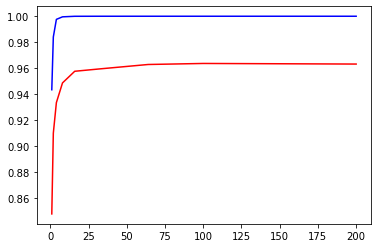

In [8]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_score = []
test_score = []

for n_estimator in n_estimators:
    rfc = RandomForestClassifier(n_estimators=n_estimator)
    rfc.fit(X_train, Y_train)
    
    register_score(rfc, train_score, X_train, Y_train)
    register_score(rfc, test_score, X_test, Y_test)

print_comparison(n_estimators, train_score, test_score)

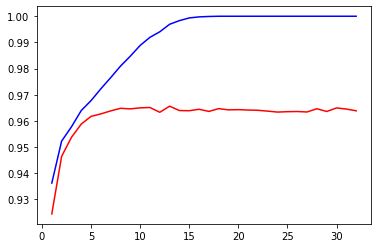

In [11]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_score = []
test_score = []

for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth)
    rfc.fit(X_train, Y_train)
    
    register_score(rfc, train_score, X_train, Y_train)
    register_score(rfc, test_score, X_test, Y_test)

print_comparison(max_depths, train_score, test_score)

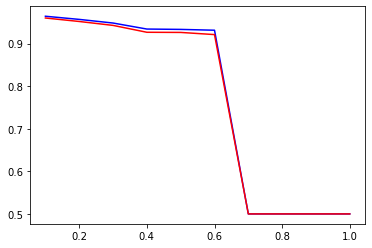

In [12]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_score = []
test_score = []

for min_samples_split in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train, Y_train)
    
    register_score(rfc, train_score, X_train, Y_train)
    register_score(rfc, test_score, X_test, Y_test)

print_comparison(min_samples_splits, train_score, test_score)

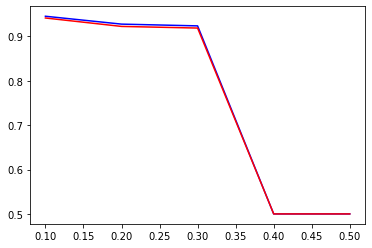

In [13]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_score = []
test_score = []

for min_samples_leaf in min_samples_leafs:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, Y_train)
    
    register_score(rfc, train_score, X_train, Y_train)
    register_score(rfc, test_score, X_test, Y_test)

print_comparison(min_samples_leafs, train_score, test_score)

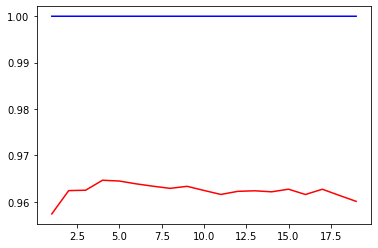

In [14]:
max_features = list(range(1,X_train.shape[1]))

train_score = []
test_score = []

for max_feature in max_features:
    rfc = RandomForestClassifier(max_features=max_feature)
    rfc.fit(X_train, Y_train)
    
    register_score(rfc, train_score, X_train, Y_train)
    register_score(rfc, test_score, X_test, Y_test)

print_comparison(max_features, train_score, test_score)

In [24]:
from optuna.trial import Trial

def objective(trial):
    n_estimators = trial.suggest_categorical("n_estimators", [1, 2, 4, 8, 16, 32, 64, 100, 200])
    max_depth = trial.suggest_int("max_depth", 1, 32, step=1)
    min_samples_split = trial.suggest_float("min_samples_split", 0.1, 1.0, step=0.05)
    min_samples_leaf = trial.suggest_float("min_samples_leaf", 0.1, 0.5, step=0.05)
    max_features = trial.suggest_int("max_features", 1, X.shape[1], step=1)

    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features)

    list_of_score = cross_validate(rfc, X, Y, cv=7, scoring=("roc_auc","f1", "neg_log_loss"))
    score = sum(list_of_score['test_roc_auc']) / len(list_of_score['test_roc_auc'])
    return score #, score

study = optuna.create_study(study_name="Optmizing multi-objective", directions=["maximize"])
study.optimize(objective, n_trials=10, timeout=300)

plt1 = optuna.visualization.plot_edf(study)
plt2 = optuna.visualization.plot_param_importances(study)

plt1.update_layout(width=1000,height=500)
plt2.update_layout(width=1000,height=500)

plt1.show()
plt2.show()


[I 2021-11-14 00:29:23,975] A new study created in memory with name: Optmizing multi-objective
[I 2021-11-14 00:29:24,980] Trial 0 finished with value: 0.9238997926255182 and parameters: {'n_estimators': 32, 'max_depth': 19, 'min_samples_split': 0.35, 'min_samples_leaf': 0.1, 'max_features': 4}. Best is trial 0 with value: 0.9238997926255182.
[I 2021-11-14 00:29:25,020] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 1, 'max_depth': 25, 'min_samples_split': 0.85, 'min_samples_leaf': 0.25, 'max_features': 6}. Best is trial 0 with value: 0.9238997926255182.
[I 2021-11-14 00:29:27,061] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 1.0, 'min_samples_leaf': 0.2, 'max_features': 6}. Best is trial 0 with value: 0.9238997926255182.
[I 2021-11-14 00:29:27,177] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 8, 'max_depth': 2, 'min_samples_split': 0.55, 'min_samples_leaf': 0.4, 'max_features': 14}. 